In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

cctrans = pd.read_parquet('/Users/jcervan/Desktop/DS4A Fall - Data Challenges/Finance/Datasets/credit_card_transaction_data_de.parquet', engine='pyarrow')
ccuser = pd.read_parquet('/Users/jcervan/Desktop/DS4A Fall - Data Challenges/Finance/Datasets/credit_card_users_de.parquet', engine='pyarrow')
cards = pd.read_parquet('/Users/jcervan/Desktop/DS4A Fall - Data Challenges/Finance/Datasets/sd254_cards_de.parquet', engine='pyarrow')

In [2]:
cctrans.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
4136,0,0,2016,1,3,10:48,$66.48,Chip Transaction,-3345936507911876459,La Verne,CA,91750.0,7538,None,No
4137,0,0,2016,1,4,06:43,$40.02,Chip Transaction,-34551508091458520,La Verne,CA,91750.0,5912,None,No
4138,0,0,2016,1,7,09:30,$54.11,Chip Transaction,4055257078481058705,La Verne,CA,91750.0,7538,None,No
4139,0,0,2016,1,7,16:03,$89.48,Chip Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,None,No
4140,0,0,2016,1,10,06:38,$29.15,Chip Transaction,-5475680618560174533,Monterey Park,CA,91755.0,5942,None,No


In [3]:
ccuser.head()


,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards
0,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5
1,Sasha Sadr,53,68,1966,12,Female,3606 Federal Boulevard,NaN,Little Neck,NY,11363,40.76,-73.74,$37891,$77254,$191349,701,5
2,Saanvi Lee,81,67,1938,11,Female,766 Third Drive,NaN,West Covina,CA,91792,34.02,-117.89,$22681,$33483,$196,698,5
3,Everlee Clark,63,63,1957,1,Female,3 Madison Street,NaN,New York,NY,10069,40.71,-73.99,$163145,$249925,$202328,722,4
4,Kyle Peterson,43,70,1976,9,Male,9620 Valley Stream Drive,NaN,San Francisco,CA,94117,37.76,-122.44,$53797,$109687,$183855,675,1


In [4]:
cards.head()

,User,CARD INDEX,Card Brand,Card Type,Card Number,Expires,CVV,Has Chip,Cards Issued,Credit Limit,Acct Open Date,Year PIN last Changed,Card on Dark Web
0,0,0,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,0,1,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No
2,0,2,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No
3,0,3,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012,No
4,0,4,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009,No


In [5]:
cards.dtypes

User                      int64
CARD INDEX                int64
Card Brand               object
Card Type                object
Card Number               int64
Expires                  object
CVV                       int64
Has Chip                 object
Cards Issued              int64
Credit Limit             object
Acct Open Date           object
Year PIN last Changed     int64
Card on Dark Web         object
dtype: object

In [6]:
## Transforming the data provided for all imported files
cctrans['Amount'] = cctrans['Amount'].str.strip('$').astype(float)
cctrans['Is Fraud?'] = cctrans['Is Fraud?'].replace('No',0).replace('Yes',1)
cctrans["Hour"] = cctrans["Time"].str [0:2]
cctrans["Minute"] = cctrans["Time"].str [3:5]
cctrans = cctrans.drop(['Time'],axis=1)

ccuser['User Id'] = ccuser.index
ccuser['Per Capita Income - Zipcode'] = ccuser['Per Capita Income - Zipcode'].str.strip('$').astype(float)
ccuser['Yearly Income - Person'] = ccuser['Yearly Income - Person'].str.strip('$').astype(float)
ccuser['Total Debt'] = ccuser['Total Debt'].str.strip('$').astype(float)

cards['Credit Limit'] = cards['Credit Limit'].str.strip('$').astype(float)
cards['Card'] = cards['CARD INDEX']

## Merging the files based on columns
finance3 = pd.merge(cctrans, cards, on=['User','Card'], how='left')
finance = pd.merge(finance3, ccuser, left_on='User', right_on='User Id', how='left')

/var/folders/nf/4ngs_jtx63d3nmymwr4mxf_w0000gn/T/ipykernel_20153/4282326019.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cctrans['Is Fraud?'] = cctrans['Is Fraud?'].replace('No',0).replace('Yes',1)


In [7]:
## Dropping duplicates and determining which components of the data have a lot of null values.
finance.drop_duplicates()
print(finance.isnull().sum())

User                                 0
Card                                 0
Year                                 0
Month                                0
Day                                  0
Amount                               0
Use Chip                             0
Merchant Name                        0
Merchant City                        0
Merchant State                  860764
Zip                             907586
MCC                                  0
Errors?                        6768768
Is Fraud?                            0
Hour                                 0
Minute                               0
CARD INDEX                           0
Card Brand                           0
Card Type                            0
Card Number                          0
Expires                              0
CVV                                  0
Has Chip                             0
Cards Issued                         0
Credit Limit                         0
Acct Open Date           

In [8]:
## Selecting only fraud data to explore which factors have high fraud counts
fraud_data = finance[finance['Is Fraud?']==1]
non_fraud = finance[finance['Is Fraud?']==0]

## Separating fraud data based on data types
numFraudData = fraud_data.select_dtypes('number')
objFraudData = fraud_data.select_dtypes('object')

array([[<Axes: title={'center': 'User'}>,
        <Axes: title={'center': 'Card'}>,
        <Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Day'}>],
       [<Axes: title={'center': 'Amount'}>,
        <Axes: title={'center': 'Merchant Name'}>,
        <Axes: title={'center': 'Zip'}>, <Axes: title={'center': 'MCC'}>,
        <Axes: title={'center': 'Is Fraud?'}>],
       [<Axes: title={'center': 'CARD INDEX'}>,
        <Axes: title={'center': 'Card Number'}>,
        <Axes: title={'center': 'CVV'}>,
        <Axes: title={'center': 'Cards Issued'}>,
        <Axes: title={'center': 'Credit Limit'}>],
       [<Axes: title={'center': 'Year PIN last Changed'}>,
        <Axes: title={'center': 'Current Age'}>,
        <Axes: title={'center': 'Retirement Age'}>,
        <Axes: title={'center': 'Birth Year'}>,
        <Axes: title={'center': 'Birth Month'}>],
       [<Axes: title={'center': 'Apartment'}>,
        <Axes: title={'cente

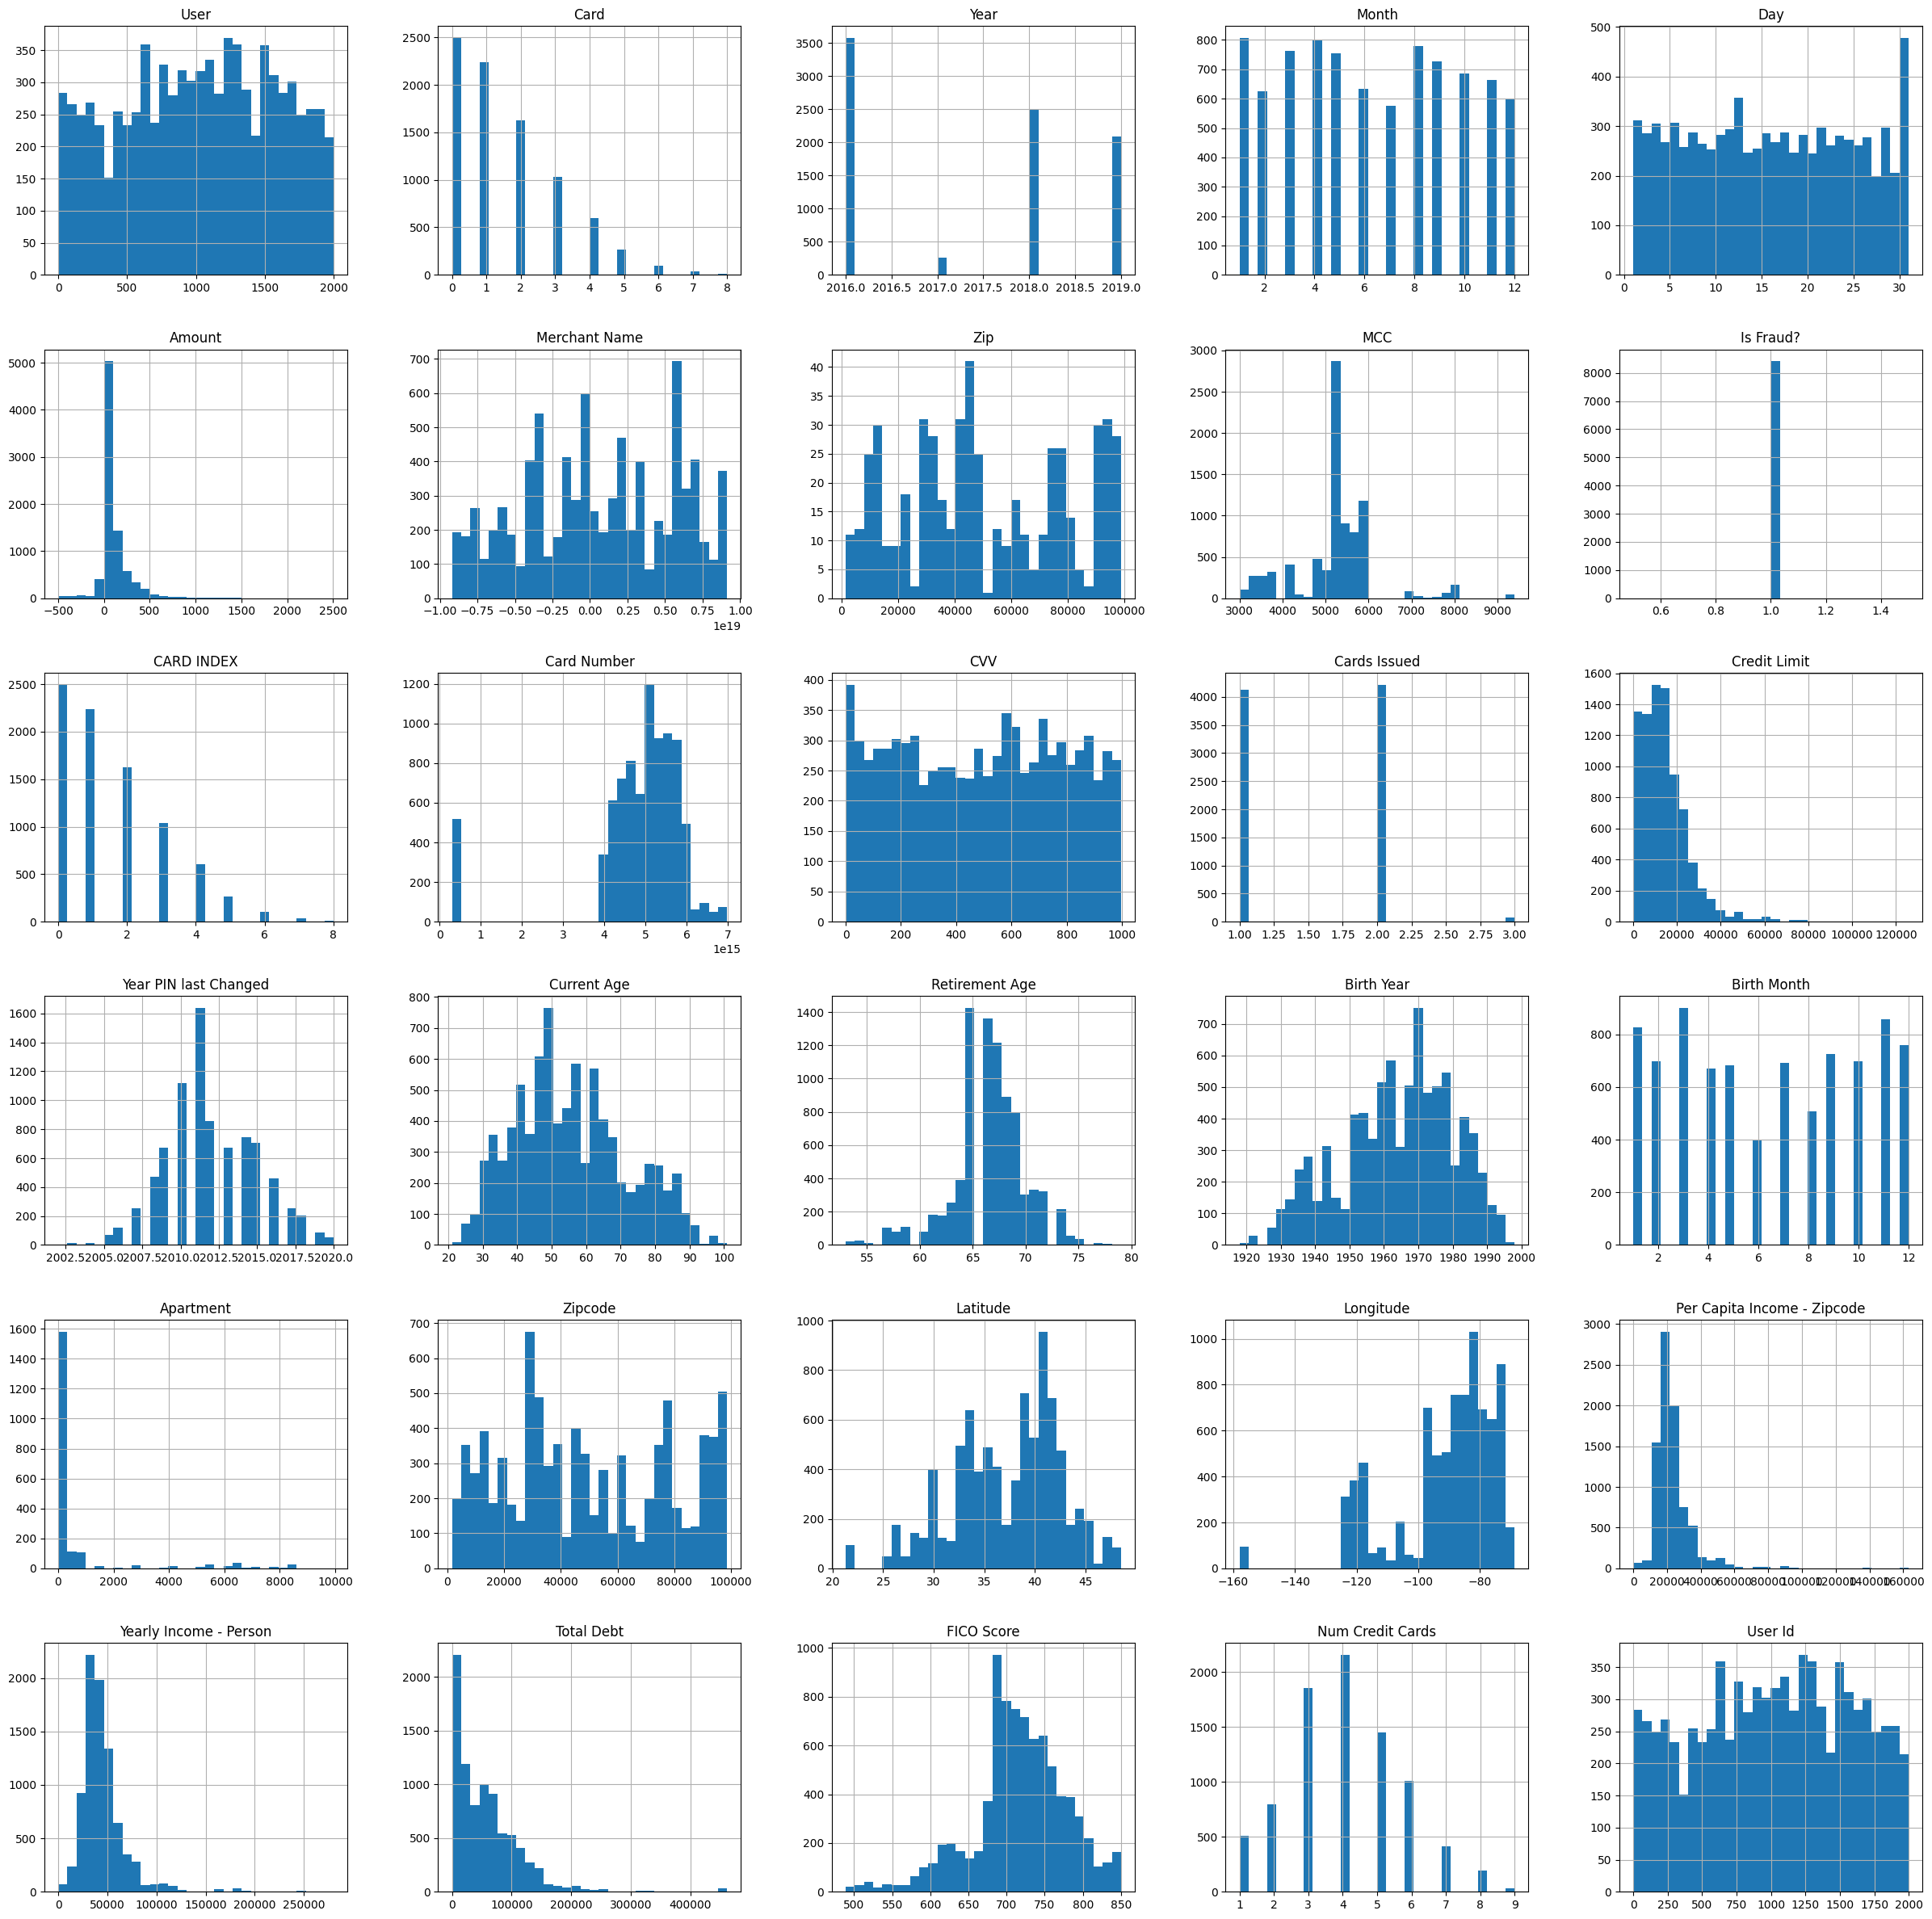

In [9]:
numFraudData.hist(bins=30,figsize=(30,30))

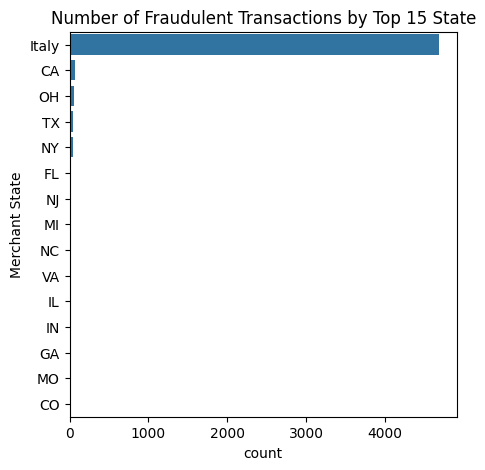

In [10]:
plt.figure(figsize=(5, 5))  
sns.countplot(data=objFraudData, y='Merchant State', order=objFraudData['Merchant State'].value_counts().head(15).index)
plt.title('Number of Fraudulent Transactions by Top 15 State')
plt.show()

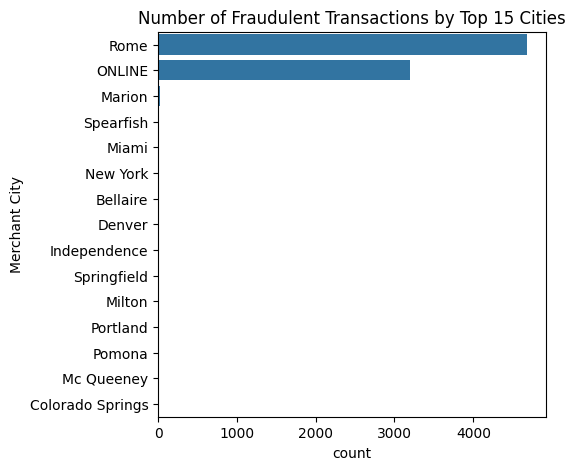

In [11]:
plt.figure(figsize=(5, 5))
top_cities = objFraudData['Merchant City'].value_counts().head(15).index
sns.countplot(data=objFraudData, y='Merchant City', order=top_cities)
plt.title('Number of Fraudulent Transactions by Top 15 Cities')
plt.show()

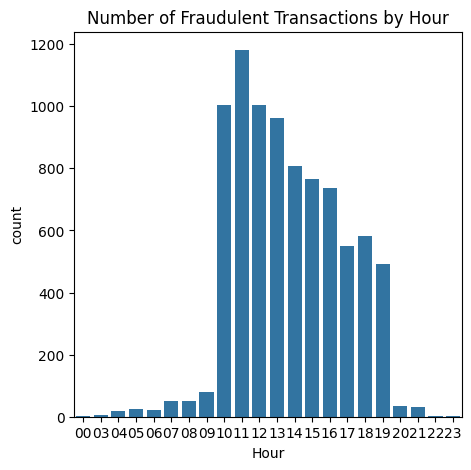

In [12]:
plt.figure(figsize=(5, 5))
sns.countplot(data=objFraudData, x='Hour', order=sorted(fraud_data['Hour'].unique()))
plt.title('Number of Fraudulent Transactions by Hour')
plt.show()

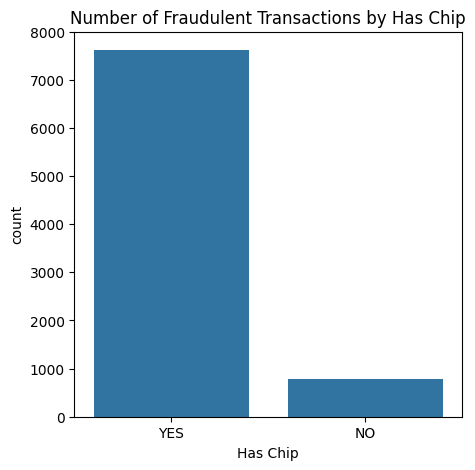

In [13]:
plt.figure(figsize=(5, 5))
sns.countplot(data=objFraudData, x='Has Chip')
plt.title('Number of Fraudulent Transactions by Has Chip')
plt.show()

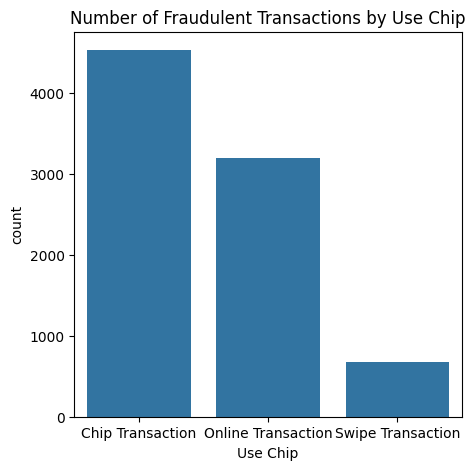

In [14]:
plt.figure(figsize=(5, 5))
sns.countplot(data=objFraudData, x='Use Chip')
plt.title('Number of Fraudulent Transactions by Use Chip')
plt.show()

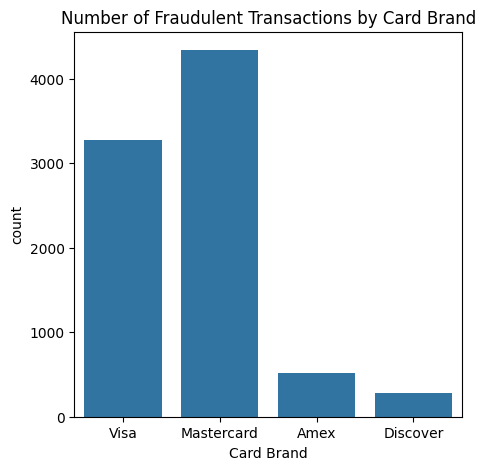

In [15]:
plt.figure(figsize=(5, 5))
sns.countplot(data=objFraudData, x='Card Brand')
plt.title('Number of Fraudulent Transactions by Card Brand')
plt.show()

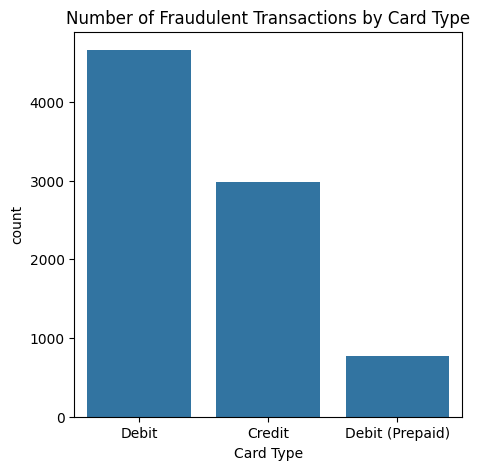

In [16]:
plt.figure(figsize=(5, 5))
sns.countplot(data=objFraudData, x='Card Type')
plt.title('Number of Fraudulent Transactions by Card Type')
plt.show()

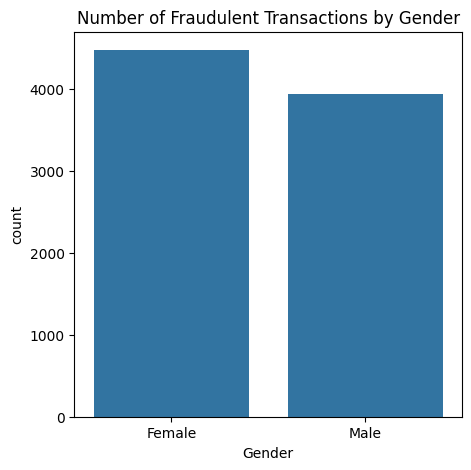

In [17]:
plt.figure(figsize=(5, 5))
sns.countplot(data=objFraudData, x='Gender')
plt.title('Number of Fraudulent Transactions by Gender')
plt.show()

In [18]:
## Selecting the columns that I want to feed into my model
select = ['Hour', 'Amount', 'Use Chip', 'Merchant Name', 'MCC', 'Card Brand','Card Type', 'Is Fraud?']
finance = finance[select]

## Transforming the columns into data that can be interpreted by the model
finance['Use Chip'] = finance['Use Chip'].replace('Chip Transaction',0).replace('Online Transaction',1).replace('Swipe Transaction',2).astype(int)
finance['Card Brand'] = finance['Card Brand'].replace('Visa',0).replace('Mastercard',1).replace('Discover',2).replace('Amex',3).astype(int)
finance['Card Type'] = finance['Card Type'].replace('Debit',0).replace('Credit',1).replace('Debit (Prepaid)',2).astype(int)
finance['Hour'] = finance['Hour'].astype(int)

/var/folders/nf/4ngs_jtx63d3nmymwr4mxf_w0000gn/T/ipykernel_20153/3131650223.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  finance['Use Chip'] = finance['Use Chip'].replace('Chip Transaction',0).replace('Online Transaction',1).replace('Swipe Transaction',2).astype(int)
/var/folders/nf/4ngs_jtx63d3nmymwr4mxf_w0000gn/T/ipykernel_20153/3131650223.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  finance['Card Brand'] = finance['Card Brand'].replace('Visa',0).replace('Mastercard',1).replace('Discover',2).replace('Amex',3).astyp

In [19]:
## Count the amount of fraud and non-fraud data

fd = len(fraud_data['Is Fraud?'])
nfd = len(non_fraud['Is Fraud?'])

print('Fraudulent Transactions: ' + str(fd) + ' |'+ ' Non-Fraudulent Transactions: ' + str(nfd))

Fraudulent Transactions: 8412 | Non-Fraudulent Transactions: 6869425


In [20]:
## From the results above, we see that there is a huge discrepancy between the fraudulent and non-fraudulent data.
## We need to undersample the data to be able to run it into a machine learning model.

import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = finance.drop('Is Fraud?', axis=1)
y = finance['Is Fraud?']

## Scaling the amount column since it has a big range of values
sc = StandardScaler()
X['Amount'] = sc.fit_transform(X[['Amount']])

desired_proportion = 0.2
fraud_samples = 8412 # Number of fraudulent data
total_samples = int(fraud_samples/desired_proportion)

## Create RandomUnderSampler with the desired sampling strategy
rus = RandomUnderSampler(sampling_strategy={0: total_samples - fraud_samples, 1: fraud_samples}, random_state=1613)

## Apply random undersampling to the original dataset
X_resampled, y_resampled = rus.fit_resample(X, y)

## Split the resampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=1613)

In [21]:
## Logistic Regression Model as our base case to determine how it categorizes fraudulent and non-fraudulent transactions
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.54      0.65     10085
           1       0.22      0.52      0.31      2533

    accuracy                           0.53     12618
   macro avg       0.52      0.53      0.48     12618
weighted avg       0.70      0.53      0.58     12618



In [22]:
## RandomForestClassifier Model to compare to our base case and determine how it categorizes fraudulent and non-fraudulent transactions
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_jobs=-1)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     10085
           1       0.91      0.80      0.85      2533

    accuracy                           0.94     12618
   macro avg       0.93      0.89      0.91     12618
weighted avg       0.94      0.94      0.94     12618

